## Buyer's Time Prediction Challenge

<B> Problem Statement :</b> Buyers spend a significant amount of time surfing an e-commerce store, since the pandemic the e-commerce has seen a boom in the number of users across the domains. In the meantime, the store owners are also planning to attract customers using various algorithms to leverage customer behavior patterns

Tracking customer activity is also a great way of understanding customer behavior and figuring out what can actually be done to serve them better. Machine learning and AI has already played a significant role in designing various recommendation engines to lure customers by predicting their buying patterns

In this competition provided the visitor's session data, we are challenging the Machinehack community to come up with a regression algorithm to predict the time a buyer will spend on the platform.

<b>The submission will be evaluated using the RMSLE metric

## EDA

In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Enable max rows and column in display

pd.pandas.set_option('display.max_rows', None)
pd.pandas.set_option('display.max_columns', None)

In [3]:
#load train data and show it
df = pd.read_csv('Train.csv')
df.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2019-12-30,0,1,0,455.201
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,2019-09-10,0,0,0,1164.877


In [4]:
#load test data and show it
df_test = pd.read_csv('Test.csv')
df_test.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out
0,0bf72b05b2cf70dc5e28c3c09f9c4f97,99,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,Desktop - IE,2020-01-07,1,0,0
1,6bc696d99954e4f1367e845465186aef,935,Product/160393 Android/4.3 Device/samsung_GT-I...,Android Phone - Android,2020-02-13,0,0,0
2,3d8611a5ea0f621d205b67f09f663a89,902,Product/4.2.2 iPhone/7.1.2,iPhone - iOS,2019-10-14,1,0,0
3,a0351545c032fd0da36289410c6c3354,3223,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2020-01-26,0,0,0
4,dd8999772b0ab27225fb05e5df2f1da6,231,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-29,0,0,0


In [5]:
#size of dataset
print('Train data',df.shape)
print('Test data',df_test.shape)

Train data (5429, 9)
Test data (2327, 8)


In [6]:
# check the uniqueness of session_id in train data
print('No of unique session_id in train data',len(df['session_id'].unique()))
print('No of rows in the test data', len(df))

No of unique session_id in train data 5429
No of rows in the test data 5429


In [7]:
# check the uniqueness of session_id in test data
print('No of unique session_id in train data',len(df_test['session_id'].unique()))
print('No of rows in the test data', len(df_test))

No of unique session_id in train data 2327
No of rows in the test data 2327


session_id is a unique field hence not much help in analysis

In [8]:
#test for null

df.isnull().sum()

session_id          0
session_number      0
client_agent      160
device_details      0
date                0
purchased           0
added_in_cart       0
checked_out         0
time_spent          0
dtype: int64

In [9]:
df_test.isnull().sum()

session_id         0
session_number     0
client_agent      59
device_details     0
date               0
purchased          0
added_in_cart      0
checked_out        0
dtype: int64

In [10]:
#test for duplicate

df.duplicated().sum()

0

In [11]:
df_test.duplicated().sum()

0

<b>session_number

In [12]:
print('No of unique session_number in train data',len(df['session_number'].unique()))

No of unique session_number in train data 610


Text(0.5, 1.0, 'session_number')

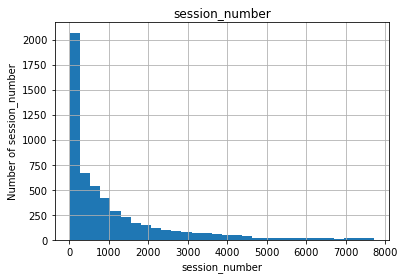

In [13]:
#distribution of 

df['session_number'].hist(bins=30)
plt.ylabel('Number of session_number')
plt.xlabel('session_number')
plt.title('session_number')

<b>device_details	

In [14]:
print('Unique device_details: ',df['device_details'].unique())

Unique device_details:  ['Desktop - Chrome' 'iPhone - iOS' 'iPhone - MobileWeb' 'Desktop - IE'
 'iPhone - Web' 'Android Phone - Android' 'Desktop - Firefox'
 'Android Tablet - Web' 'iPad - Web' 'Other - Other' 'Desktop - Safari'
 'Android Phone - Web' 'iPad - iOS' 'Android Phone - MobileWeb'
 'Unknown - MobileWeb' 'Android Tablet - Android'
 'Android Tablet - MobileWeb']


In [15]:
print('Unique device_details (Test Set): ',df_test['device_details'].unique())

Unique device_details (Test Set):  ['Desktop - IE' 'Android Phone - Android' 'iPhone - iOS'
 'Desktop - Chrome' 'Unknown - MobileWeb' 'Android Tablet - Web'
 'Android Phone - Web' 'iPhone - MobileWeb' 'iPad - iOS' 'iPad - Web'
 'iPhone - Web' 'Desktop - Firefox' 'Other - Other' 'Desktop - Safari'
 'Android Tablet - Android' 'Android Phone - MobileWeb']


'Android Tablet - MobileWeb' in train data doesn't exist in test set

Frequency of each category ->

In [16]:
#max used device
plt.figure(figsize=(12,8))
df['device_details'].value_counts().sort_values()

Android Tablet - MobileWeb       2
Android Tablet - Android         9
Android Phone - MobileWeb       54
iPad - iOS                      77
Android Phone - Web             86
Unknown - MobileWeb             87
Other - Other                  185
Android Tablet - Web           203
Desktop - Firefox              234
iPhone - MobileWeb             277
iPad - Web                     289
Desktop - IE                   292
Desktop - Safari               313
Android Phone - Android        326
iPhone - Web                   665
Desktop - Chrome               815
iPhone - iOS                  1515
Name: device_details, dtype: int64

<Figure size 864x576 with 0 Axes>

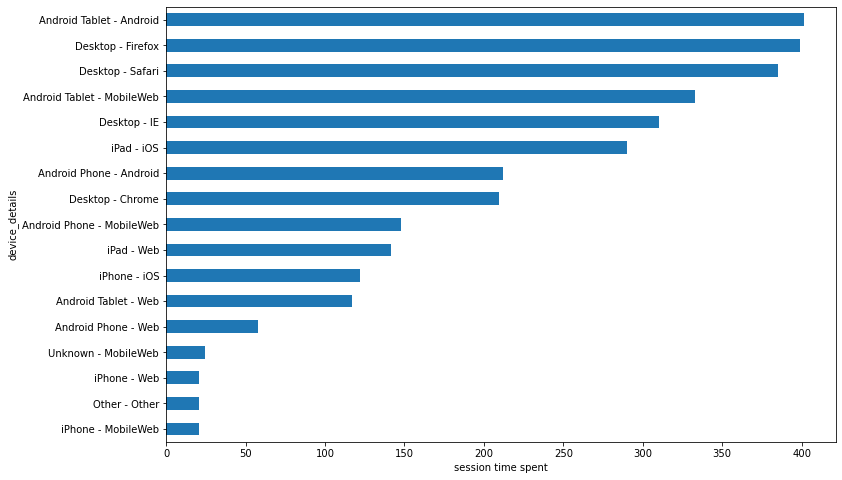

In [17]:
#max used device on time_spent

plt.figure(figsize=(12,8))
df.groupby('device_details')['time_spent'].median().sort_values().plot(kind='barh')
plt.xlabel('session time spent')
plt.show()

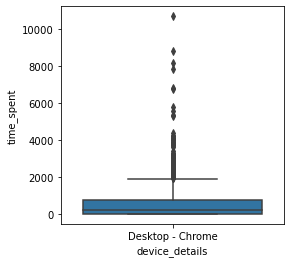

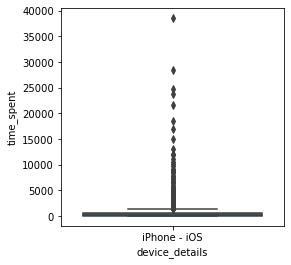

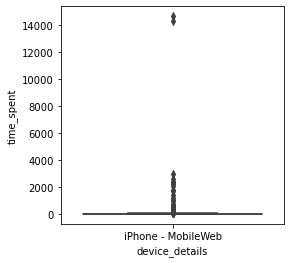

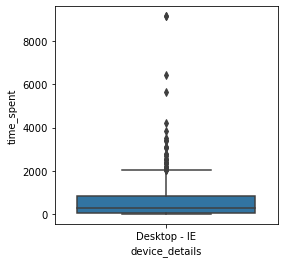

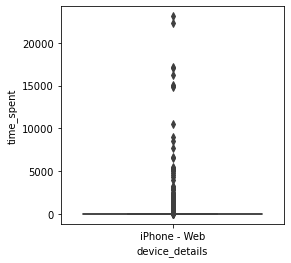

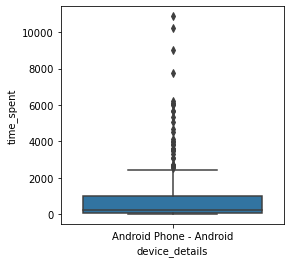

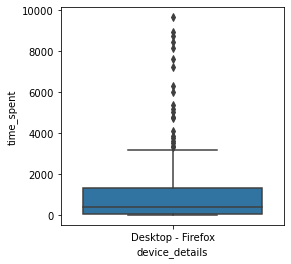

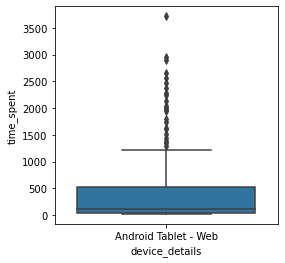

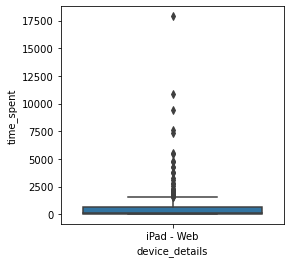

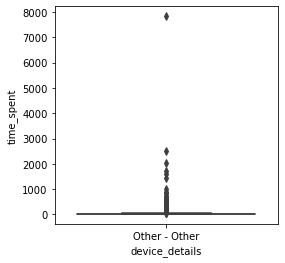

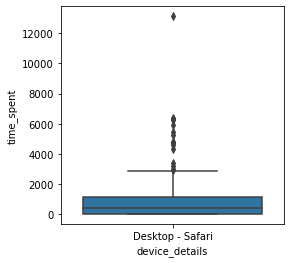

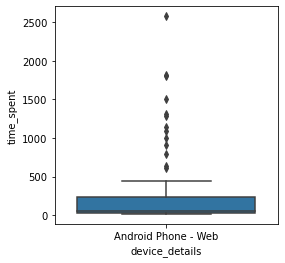

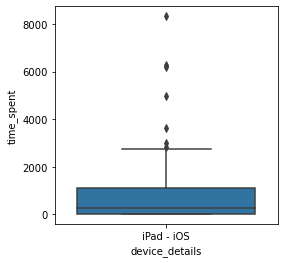

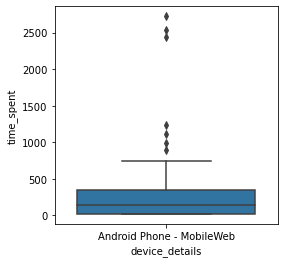

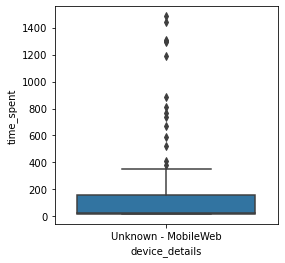

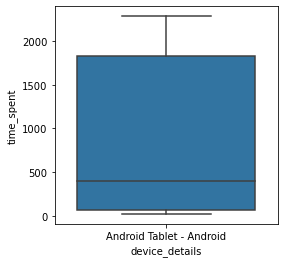

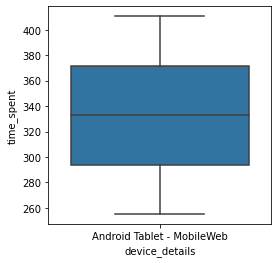

In [18]:
#create boxplot to see distribution of time spent device wise

for var in df['device_details'].unique():
    plt.figure(figsize=(4,4))
    sns.boxplot(x=df['device_details'][df['device_details']==var],y=df['time_spent'][df['device_details']==var])
    plt.show()

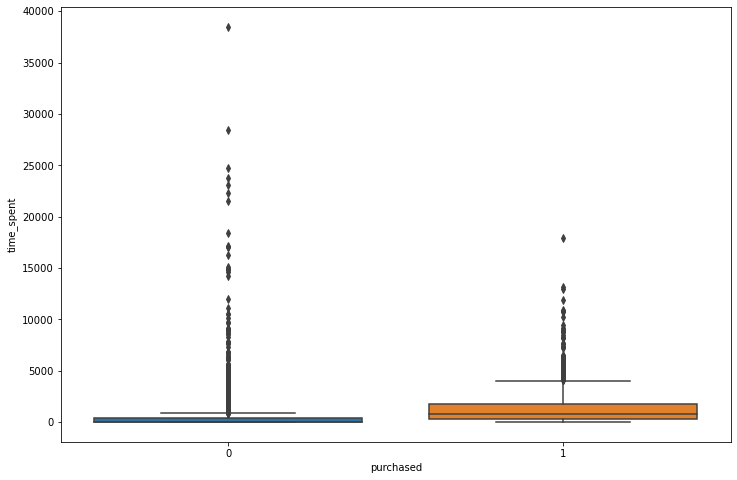

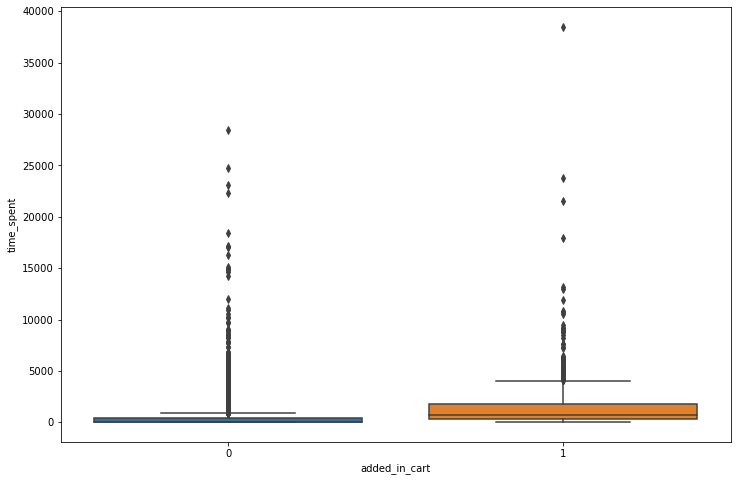

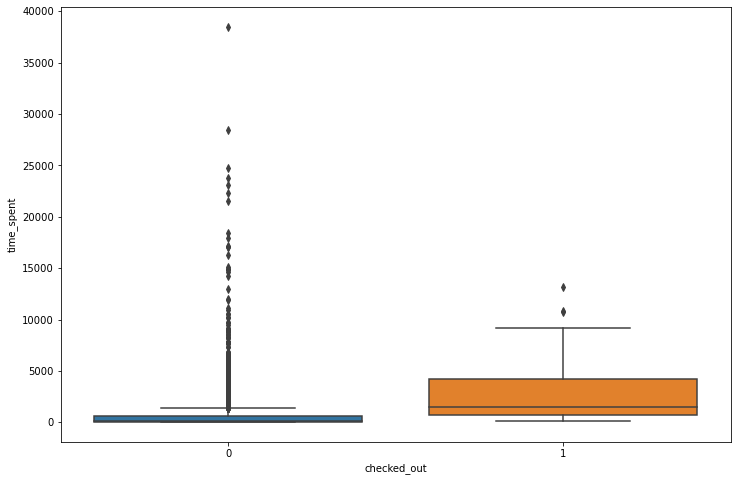

In [19]:
# box plot for three binary fields and how they impact time

for var in ['purchased','added_in_cart','checked_out']:
    plt.figure(figsize=(12,8))
    sns.boxplot(x=var,y='time_spent',data=df)
    plt.show()

<b> check distribution of time_spent

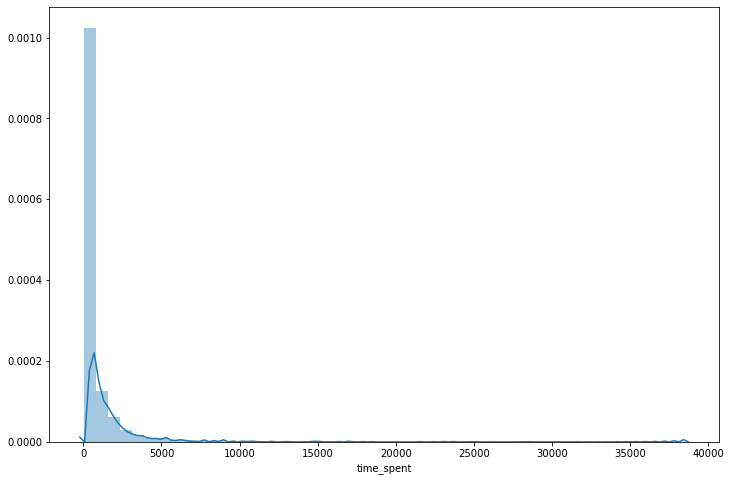

In [20]:
#distribution plot

plt.figure(figsize=(12,8))
sns.distplot(df['time_spent'])

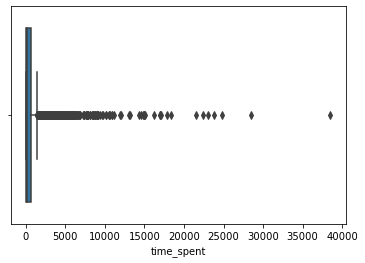

In [21]:
#boxplot

sns.boxplot(df['time_spent'])

In [22]:
#check for any possible outliers

print('No of time_spent > 20000',len(df[df['time_spent']>20000]), '| % of total data', len(df[df['time_spent']>20000])/len(df))
print('No of time_spent > 10000',len(df[df['time_spent']>10000]), '| % of total data', len(df[df['time_spent']>10000])/len(df))
print('No of time_spent > 5000',len(df[df['time_spent']>5000]), '| % of total data', len(df[df['time_spent']>5000])/len(df))
print('No of time_spent > 2500',len(df[df['time_spent']>2500]), '| % of total data', len(df[df['time_spent']>2500])/len(df))

No of time_spent > 20000 7 | % of total data 0.0012893718916927612
No of time_spent > 10000 31 | % of total data 0.005710075520353656
No of time_spent > 5000 119 | % of total data 0.021919322158776938
No of time_spent > 2500 325 | % of total data 0.059863694971449624


In [23]:
#descriptive stats of the field 

df['time_spent'].describe()

count     5429.000000
mean       663.194292
std       1713.671664
min         14.400000
25%         22.699000
50%         98.312000
75%        600.463000
max      38494.025000
Name: time_spent, dtype: float64

## Feature Engineering

<b>Droping session_id</B> because it is an unique field

In [24]:
#drop the column in both train and test set

df = df.drop('session_id',axis=1)
df_test = df_test.drop('session_id',axis=1)

<b>date</b>
manipulate date field and drop it afterwards

In [25]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].apply(lambda date:date.year)
df['month'] = df['date'].apply(lambda date:date.month)

df = df.drop('date',axis=1)
df.head()

,session_number,client_agent,device_details,purchased,added_in_cart,checked_out,time_spent,year,month
0,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,1,0,0,236.886,2020,1
1,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,1,0,0,1277.455,2020,2
2,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,0,0,0,21.704,2019,8
3,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,0,1,0,455.201,2019,12
4,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,0,0,0,1164.877,2019,9


In [26]:
#test dataset
df_test['date'] = pd.to_datetime(df_test['date'])
df_test['year'] = df_test['date'].apply(lambda date:date.year)
df_test['month'] = df_test['date'].apply(lambda date:date.month)

df_test = df_test.drop('date',axis=1)
df_test.head()

,session_number,client_agent,device_details,purchased,added_in_cart,checked_out,year,month
0,99,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,Desktop - IE,1,0,0,2020,1
1,935,Product/160393 Android/4.3 Device/samsung_GT-I...,Android Phone - Android,0,0,0,2020,2
2,902,Product/4.2.2 iPhone/7.1.2,iPhone - iOS,1,0,0,2019,10
3,3223,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,0,0,0,2020,1
4,231,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,Desktop - Chrome,0,0,0,2020,1


<b>device_details</b>
created dummy for device_details and grouped least used 7 category to one dummy

In [27]:
var_device_details = df['device_details'].unique()
for var in var_device_details:
    if var !='Other - Other' and var !='Unknown - MobileWeb' and var !='Android Phone - Web' and var != 'iPad - iOS' and var != 'Android Phone - MobileWeb' and var != 'Android Tablet - Android' and var != 'Android Tablet - MobileWeb':
        df[var] = np.where(df['device_details'] == var,1,0)

In [28]:
df['others'] = np.where((df['device_details'] =='Other - Other') | (df['device_details']=='Unknown - MobileWeb') 
                           | (df['device_details']=='Android Phone - Web') | (df['device_details']== 'iPad - iOS') 
                           | (df['device_details']== 'Android Phone - MobileWeb') | (df['device_details']== 'Android Tablet - Android') 
                           | (df['device_details']== 'Android Tablet - MobileWeb'),1,0)

Test set

In [29]:
var_device_details = df_test['device_details'].unique()
for var in var_device_details:
    if var !='Other - Other' and var !='Unknown - MobileWeb' and var !='Android Phone - Web' and var != 'iPad - iOS' and var != 'Android Phone - MobileWeb' and var != 'Android Tablet - Android' and var != 'Android Tablet - MobileWeb':
        df_test[var] = np.where(df_test['device_details'] == var,1,0)

In [30]:
df_test['others'] = np.where((df_test['device_details'] =='Other - Other') | (df_test['device_details']=='Unknown - MobileWeb') 
                           | (df_test['device_details']=='Android Phone - Web') | (df_test['device_details']== 'iPad - iOS') 
                           | (df_test['device_details']== 'Android Phone - MobileWeb') | (df_test['device_details']== 'Android Tablet - Android') 
                           | (df_test['device_details']== 'Android Tablet - MobileWeb'),1,0)

drop device_details field from both dataset

In [31]:
df = df.drop('device_details',axis=1)
df_test = df_test.drop('device_details',axis=1)

drop client_agent field from both dataset

In [32]:
df = df.drop('client_agent',axis=1)
df_test = df_test.drop('client_agent',axis=1)

<b>Rank session no based on time spent

In [33]:
xx=df.groupby('session_number')['time_spent'].median().sort_values()
temp_df=pd.DataFrame(xx)
temp_df.reset_index(inplace=True)
temp_df['serial']=temp_df.index

dic_session = pd.Series(temp_df.serial.values,index=temp_df.session_number).to_dict()

df['sees_rank'] = df['session_number'].map(dic_session)
df_test['sees_rank']=df_test['session_number'].map(dic_session)

In [34]:
#drop the field as new rank has been assigned
df.drop('session_number',axis=1,inplace=True)
df_test.drop('session_number',axis=1,inplace=True)

In [35]:
#fill null values in the new field of test dataset
df_test['sees_rank'].fillna(method='ffill',inplace=True)

## Preprocessing for ML

Split the data high and low subset based on time_spent. We'll train the high time spend data and low time spend data separately and predict the output of test set based on this and take average of the same

In [36]:
df_lo=df[df['time_spent']<=98]
df_hi=df[df['time_spent']>98]

In [37]:
print('Shape of low ', df_lo.shape)
print('Shape of high ', df_hi.shape)

Shape of low  (2712, 18)
Shape of high  (2717, 18)


<b>Train the low

In [38]:
#Divide the data into Feature and Label component

X = df_lo.drop(['time_spent'],axis=1).values 
y = np.log1p(df_lo['time_spent'].values) #taking log of UnitPrice for the skewed value

In [39]:
#saving column names as features
feature = df_lo.drop(['time_spent'],axis=1).columns

In [40]:
#split the data in train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [41]:
#scale the data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
#preparing test set

x1_test = df_test.values

#scaling the test set

x1_test = scaler.transform(x1_test)

<h3>Random Forest

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate,cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error,r2_score

5 Fold GridSearch is performed in RandomForest

In [44]:
rf = RandomForestRegressor()
parameters = {
    'n_estimators': [150, 170,190],
    'max_depth': [7, 8, 9]
}

rf_cv = GridSearchCV(rf, parameters, cv=5)
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [7, 8, 9],
                         'n_estimators': [150, 170, 190]})

In [45]:
#best parameters

rf_cv.best_params_

{'max_depth': 8, 'n_estimators': 170}

In [46]:
#Test set r2 and RMSLE

model_rf1 = RandomForestRegressor(max_depth=8,n_estimators=170)

model_rf1.fit(X_train,y_train)

pred_rf = np.expm1(model_rf1.predict(X_test)) #prediction (exponential taken as it was log term)

y_true = np.expm1(y_test)  #original y_test

print("RMSLE=",np.sqrt(mean_squared_log_error(y_true,pred_rf)))
print("r2_score=",r2_score(y_true,pred_rf))

RMSLE= 0.4019313184876013
r2_score= 0.17485530360236923


In [48]:
#Train set r2 and RMSLE

pred_rf_train = np.expm1(model_rf1.predict(X_train))

y_true_train = np.expm1(y_train)

print("RMSLE=",np.sqrt(mean_squared_log_error(y_true_train,pred_rf_train)))

print("r2_score=",r2_score(y_true_train,pred_rf_train))

RMSLE= 0.35896312274871073
r2_score= 0.34417942535577006


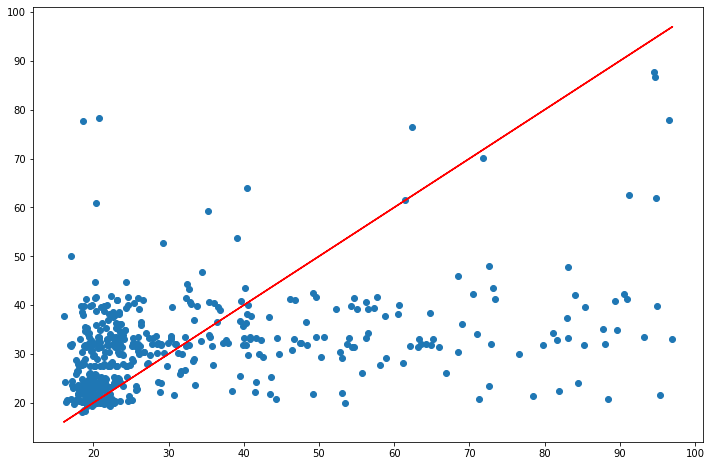

In [49]:
#prediction plot
plt.figure(figsize=(12,8))
plt.scatter(y_true,pred_rf)
plt.plot(y_true,y_true,'r')

<b>Train the high

In [50]:
#Divide the data into Feature and Label component

X = df_hi.drop(['time_spent'],axis=1).values 
y = np.log1p(df_hi['time_spent'].values) #taking log of UnitPrice for the skewed value

In [51]:
#saving column names as features
feature = df_hi.drop(['time_spent'],axis=1).columns

In [52]:
#split the data in train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

In [53]:
#scale the data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h3>Random Forest

In [54]:
rf = RandomForestRegressor()
parameters = {
    'n_estimators': [150, 170,190],
    'max_depth': [7, 8, 9]
}

rf_cv = GridSearchCV(rf, parameters, cv=5)
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [7, 8, 9],
                         'n_estimators': [150, 170, 190]})

In [55]:
#best parameters

rf_cv.best_params_

{'max_depth': 7, 'n_estimators': 170}

In [56]:
#Test set r2 and RMSLE

model_rf2 = RandomForestRegressor(max_depth=7,n_estimators=150)

model_rf2.fit(X_train,y_train)

pred_rf = np.expm1(model_rf2.predict(X_test)) #prediction (exponential taken as it was log term)

y_true = np.expm1(y_test)  #original y_test

print("RMSLE=",np.sqrt(mean_squared_log_error(y_true,pred_rf)))
print("r2_score=",r2_score(y_true,pred_rf))

RMSLE= 0.9807519668904149
r2_score= 0.4653698559920515


In [57]:
#Train set r2 and RMSLE

pred_rf_train = np.expm1(model_rf2.predict(X_train))

y_true_train = np.expm1(y_train)

print("RMSLE=",np.sqrt(mean_squared_log_error(y_true_train,pred_rf_train)))

print("r2_score=",r2_score(y_true_train,pred_rf_train))

RMSLE= 0.9369065293895887
r2_score= 0.48284934539019586


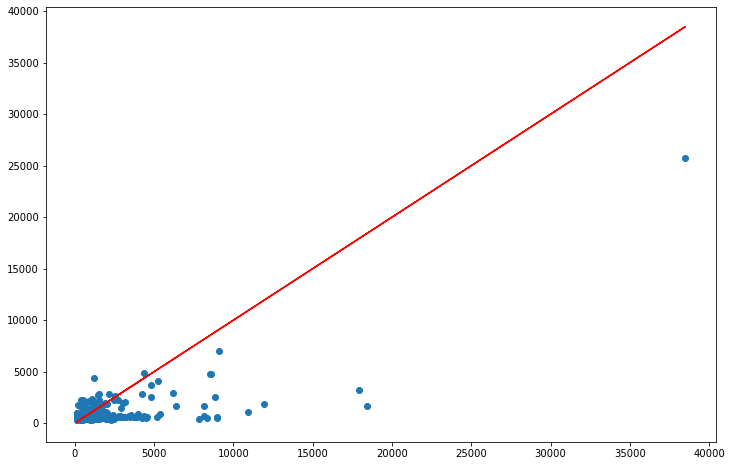

In [58]:
#prediction plot
plt.figure(figsize=(12,8))
plt.scatter(y_true,pred_rf)
plt.plot(y_true,y_true,'r')

<b>In final prediction, we obtain prediction from both training models and take the average of them as final result

In [59]:
pred_final1 = np.expm1(model_rf1.predict(x1_test))
pred_final2 = np.expm1(model_rf2.predict(x1_test))


pred_csv = pd.DataFrame(pred_final1,columns=['time_spent1'])
pred_csv ['time_spent2'] = pred_final2
pred_csv['time_spent'] = (pred_csv['time_spent1'] + pred_csv['time_spent2'])/2
pred_csv.drop(['time_spent1','time_spent2'],axis=1,inplace=True)
pred_csv.to_csv('prediction11.csv', index = False)

<b>Conclusion :<b> We have observed that in the data some devices spend more time than others, so, we break the dataset in high time spending and low time spendig, train our model with both dataset separately and make prediction from both and take mean of it. 